In [454]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split

from sklearn.cluster import DBSCAN
from scipy.optimize import least_squares

In [482]:
# 拟合圆的函数
def fit_circle(x, y):
	"""拟合圆并计算曲率半径"""
	def residuals(params):
		x0, y0, R = params
		return np.sqrt((x - x0)**2 + (y - y0)**2) - R

	# 初始猜测值（圆心在路径中心附近，半径取平均距离）
	x0_guess = np.mean(x)
	y0_guess = np.mean(y)
	R_guess = np.mean(np.sqrt((x - x0_guess)**2 + (y - y0_guess)**2))
	
	# 使用最小二乘法拟合圆
	result = least_squares(residuals, [x0_guess, y0_guess, R_guess])
	 # 拟合圆的圆心坐标和半径
	x0, y0, radius = result.x
	
	# 计算每个点的角度（相对于圆心）
	angles = np.arctan2(y - y0, x - x0)
	
	# 计算角度差（弧长）
	angle_diff = np.diff(angles)  # 计算连续点之间的角度差
	arc_length = np.sum(np.abs(angle_diff)) * radius  # 弧长 = 半径 * 角度差之和
	return radius, arc_length  # 返回曲率半径和弧长

# 计算曲率、运动时间和夹角的函数
def calculate_curvature_and_angles(head_points, tail_points, timestamps):
	# 朝向方向
	head_dirs = head_points - tail_points
	positions = (head_points + tail_points)/2
	
	# 计算每50个连续点的运动曲率半径、时间、夹角
	window_size = 200
	window_interval = 50
	num_windows = (len(head_points)-window_size-1) // window_interval
	curvatures = []
	omegas = []
	angles = []
	coeffcient_s = []
	for i in range(num_windows):
		start_idx = i * window_interval
		end_idx = i * window_interval + window_size

		# 获取当前窗口的位置数据
		x = positions[start_idx:end_idx, 0]
		y = positions[start_idx:end_idx, 1]
		
		# 拟合曲率半径和弧长
		radius, arc_length = fit_circle(x, y)
		curvatures.append(radius)

		# 计算角速度（omega），即弧长除以半径和时间差
		omega = arc_length / radius / (timestamps[end_idx-1] - timestamps[start_idx])
		omegas.append(omega)

		# 计算夹角：朝向方向和切线方向的夹角
		# 计算路径切向方向：相邻两点之间的方向
		tangent_dirs = positions[start_idx + 1:end_idx + 1] - positions[start_idx:end_idx]  # 相邻点的差值
		tangent_angles = np.arctan2(tangent_dirs[:, 1], tangent_dirs[:, 0])  # 计算切线方向的角度
		
		# 计算朝向方向的角度
		head_angles = np.arctan2(head_dirs[start_idx:end_idx, 1], head_dirs[start_idx:end_idx, 0])  # 头部方向角度
		
		# 计算夹角：朝向方向和路径切线的夹角
		angle_differences = np.abs(tangent_angles - head_angles)  # 计算角度差
		angle_differences = np.minimum(angle_differences, 2 * np.pi - angle_differences)  # 夹角是小于180度的

		# 计算平均夹角
		angles.append(np.mean(angle_differences))
		coeffcient_s.append(1.9 - omega*radius*np.cos(angle_differences) * omega * 17.447)
	# 计算窗口内的平均值
	avg_curvatures=np.mean(curvatures)
	avg_omegas=np.mean(omegas)
	avg_angles=np.mean(angles)
	avg_coeffcient = np.mean(coeffcient_s)
	# 计算窗口内的方差
	var_curvatures=np.var(curvatures)
	var_omegas=np.var(omegas)
	var_angles= np.var(angles)
	var_coeffcient = np.var(coeffcient_s)
	return avg_curvatures, avg_omegas, avg_angles, avg_coeffcient, var_curvatures, var_omegas, var_angles, curvatures, var_coeffcient, omegas, angles

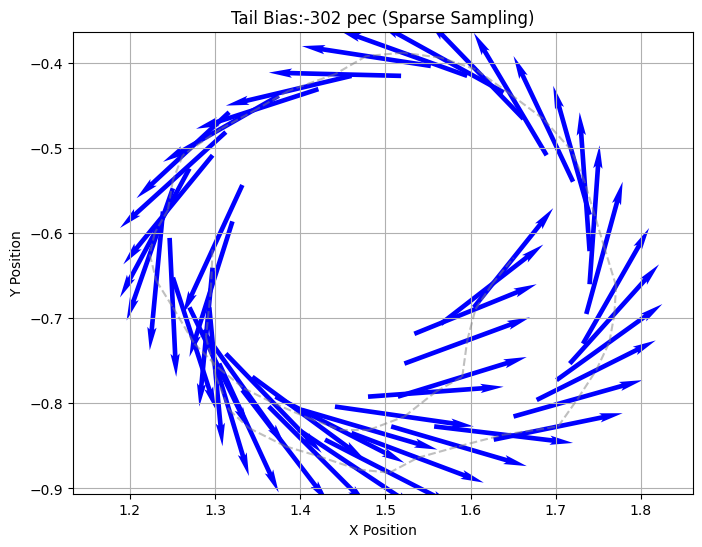

Average Curvature: 0.24824675401190555
Average omegas: 0.3540481343482777
Average Angles: 0.8175448959638058
Average coeffcient : 1.5044856007560494
Curvature Variance: 0.00041292702070383887
omegas Variance: 0.033114761134217255
Angle Variance: 0.001983749363917548
coeffcient Variance: 0.3004131529237269


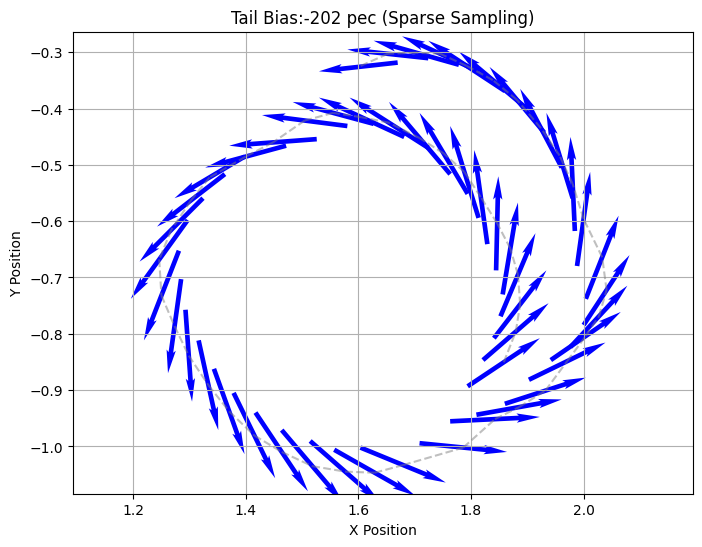

Average Curvature: 0.34418930911486545
Average omegas: 0.30156793172617224
Average Angles: 0.7323705657018291
Average coeffcient : 1.436333989517014
Curvature Variance: 0.001458108248408981
omegas Variance: 0.032177587782065635
Angle Variance: 0.0021815537703902647
coeffcient Variance: 0.37018740889442403


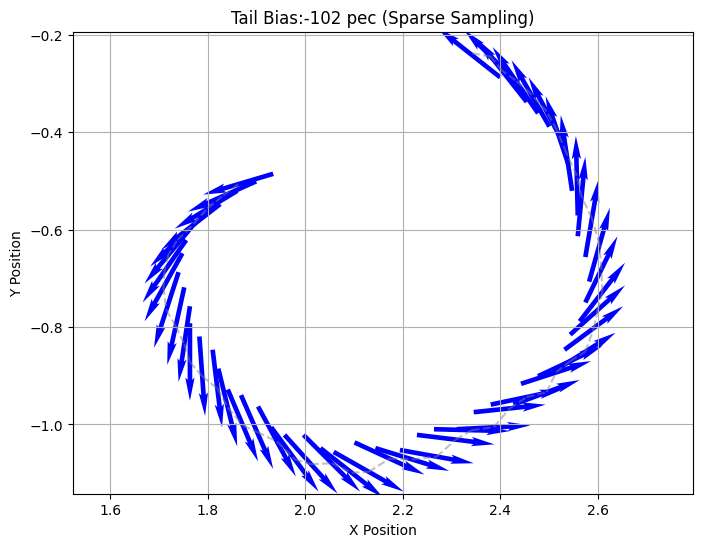

Average Curvature: 0.42249747640501517
Average omegas: 0.2738423570931467
Average Angles: 0.7257375233037987
Average coeffcient : 1.4272558134122362
Curvature Variance: 0.004346942108119415
omegas Variance: 0.03687292385348081
Angle Variance: 0.0011331372660769786
coeffcient Variance: 0.5082664647820085


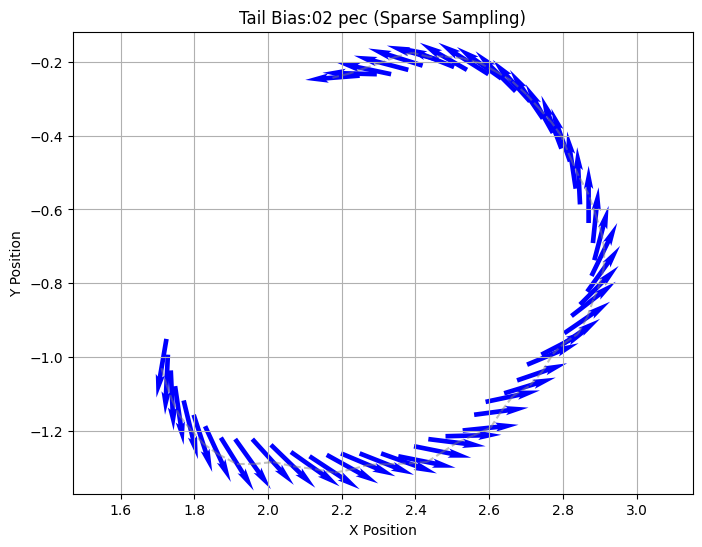

Average Curvature: 0.6523516184459994
Average omegas: 0.09888149390325403
Average Angles: 0.6808628716492153
Average coeffcient : 1.82434567853267
Curvature Variance: 0.016816954053750218
omegas Variance: 0.00035119491668235756
Angle Variance: 0.00237904628486186
coeffcient Variance: 0.0015903032167387794


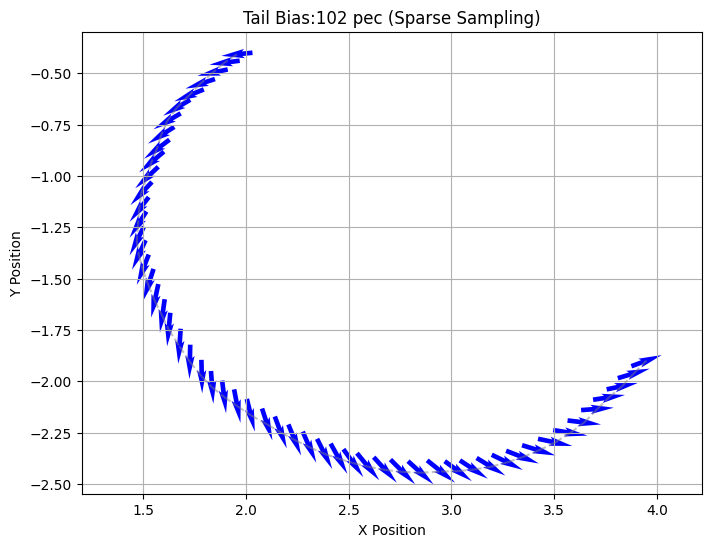

Average Curvature: 1.263934976796145
Average omegas: 0.19682255735605533
Average Angles: 0.6811628885201363
Average coeffcient : 0.7728844581732347
Curvature Variance: 0.0597750799211294
omegas Variance: 0.04888832391890366
Angle Variance: 0.004695607241173006
coeffcient Variance: 3.5196126739370794


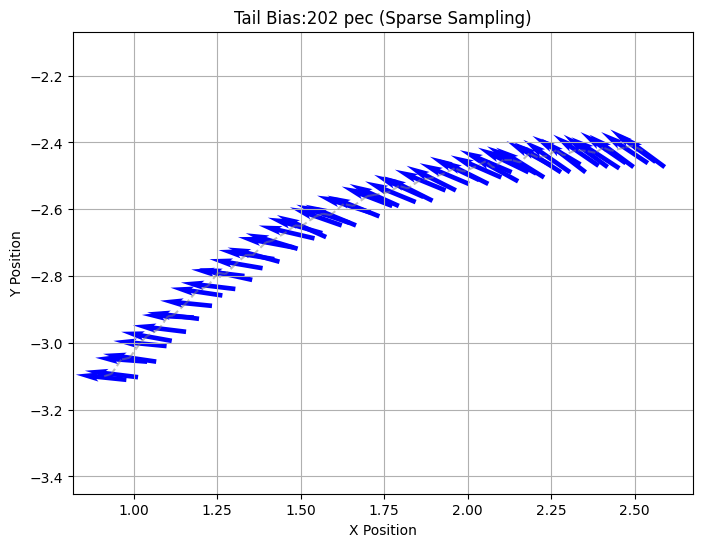

Average Curvature: 2.444845960610664
Average omegas: 0.03527896246307853
Average Angles: 0.8331427467204169
Average coeffcient : 1.868565808040797
Curvature Variance: 0.01799481595654265
omegas Variance: 1.1213506134630815e-05
Angle Variance: 0.0014497930636613518
coeffcient Variance: 0.0005503540448419183


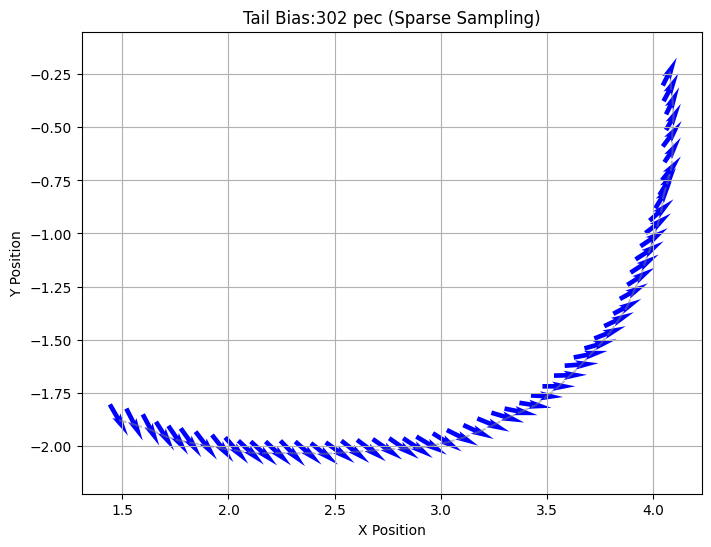

Average Curvature: 2.0636638591287677
Average omegas: 0.04741973312510456
Average Angles: 0.7217295801832222
Average coeffcient : 1.8517816481733123
Curvature Variance: 0.8329298790560296
omegas Variance: 0.00022629424369222377
Angle Variance: 0.000722845155656765
coeffcient Variance: 0.0006430475326911391


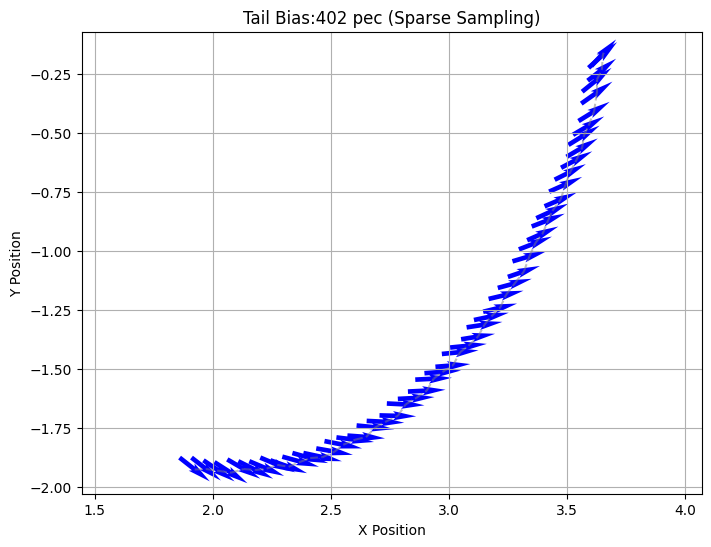

Average Curvature: 1.9148765222992885
Average omegas: 0.046168004529364905
Average Angles: 0.7162474988859602
Average coeffcient : 1.8562146346290744
Curvature Variance: 0.4128964339904598
omegas Variance: 0.0001909048744071196
Angle Variance: 0.0011843833083892159
coeffcient Variance: 0.0005714433329984218


In [486]:
# 设置文件夹路径
folder_path = "D:\work\科研项目\snippet\BacksteppingMethod\dynamic_fitting\data"#"./data"

# 使用glob获取所有csv文件路径
tail_biases = [-30, -20, -10, 0, 10, 20, 30, 40]
controll_params = [] #[mu_l, mu_r, tail_angle, tail_vel, tail_acc, u, v, omega, u_dot, v_dot]
avg_controll_params = []
# for tail_bias in tail_biases:
# 	csv_file = glob.glob(folder_path + "/Fpec_1-Bias_" + str(tail_bias) + ".csv")
# 	df = pd.read_csv(csv_file[0], header=None, names=['timestamp', 'state0','state1','state2', 'head_x', 'head_y', 'tail_x', 'tail_y'])
# 	df = df[((df['head_x'].diff().abs()>=1) |
# 					(df['head_y'].diff().abs()>=1)) & 
# 					((df['tail_x'].diff().abs()>=1) |
# 					(df['tail_y'].diff().abs()>=1))
# 					]
# 	df['head_x'] = df['head_x'] / 515 * 2
# 	df['head_y'] = -df['head_y'] / 515 * 2
# 	df['tail_x'] = df['tail_x'] / 515 * 2
# 	df['tail_y'] = -df['tail_y'] / 515 * 2
# 	df = df.reset_index(drop=True)

# 	# 示例路径点数据（二维点集，包含噪点）
# 	path_points_x = np.array(df['tail_x'])
# 	path_points_y = np.array(df['tail_y'])
# 	tail_points = np.column_stack((path_points_x, path_points_y))
# 	path_points_x = np.array(df['head_x'])
# 	path_points_y = np.array(df['head_y'])
# 	head_points = np.column_stack((path_points_x, path_points_y))
# 	timestamps = np.array(df['timestamp'])
# 	robot_points = (head_points + tail_points)/2
# 	# 绘制机器人的路径和方向（稀疏采样）
# 	fig, ax = plt.subplots(figsize=(8, 6))

# 	# 设置稀疏采样间隔
# 	sample_interval = int(len(timestamps)/50)  # 每隔50个点画一个箭头

# 	# 遍历采样后的点
# 	for i in range(0, len(head_points), sample_interval):
# 		head = head_points[i]
# 		tail = tail_points[i]
		
# 		# 计算机器人的朝向向量
# 		direction = head - tail
# 		pos = (head + tail)/2	
# 		# 画出机器人的位置（箭头的起点）
# 		ax.quiver(tail[0], tail[1], direction[0], direction[1], angles='xy', scale_units='xy', scale=1, color='blue', headwidth=2)
		
# 		# 画出路径
# 		if i > 0:
# 			prev_pos = robot_points[i - sample_interval]
# 			ax.plot([prev_pos[0], pos[0]], [prev_pos[1], pos[1]], color='gray', linestyle='--', alpha=0.5)

# 	# 设置图形参数
# 	ax.set_aspect('equal', 'box')
# 	ax.set_xlabel('X Position')
# 	ax.set_ylabel('Y Position')
# 	plt.axis('equal')
# 	plt.grid(True)
# 	plt.title("Tail Bias:"+ str(tail_bias)+" (Sparse Sampling)")
# 	plt.show()

# 	# 调用函数并打印结果
# 	avg_curvatures, avg_omegas, avg_angles, var_curvatures, var_omegas, var_angles, curvatures, omegas, angles = calculate_curvature_and_angles(head_points, tail_points, timestamps)
# 	# 输出结果
# 	print("Average Curvature:", avg_curvatures)
# 	print("Average omegas:", avg_omegas)
# 	print("Average Angles:", avg_angles)
# 	print("Curvature Variance:", var_curvatures)
# 	print("omegas Variance:", var_omegas)
# 	print("Angle Variance:", var_angles)

# 	#储存运动参数
# 	for i in range(len(curvatures)):
# 		u = omegas[i] * curvatures[i] * np.cos(angles[i])
# 		v = omegas[i] * curvatures[i] * np.sin(angles[i])
# 		controll_params.append((0, 1, [tail_bias, 2*tail_bias], [[u,v], [u,v]], [[0,0],[0,0]], u, v, omegas[i], 0, 0)) #[mu_l, mu_r, tail_angle, tail_vel, tail_acc, u, v, omega, u_dot, v_dot]

# 	#储存运动参数
# 	u = avg_omegas * avg_curvatures * np.cos(avg_angles)
# 	v = avg_omegas * avg_curvatures * np.sin(avg_angles)
# 	avg_controll_params.append([0, 1, [tail_bias, 2*tail_bias], [[u,v], [u,v]], [[0,0],[0,0]], u, v, avg_omegas, 0, 0]) #[mu_l, mu_r, tail_angle, tail_vel, tail_acc, u, v, omega, u_dot, v_dot]

coeffcient_xs = []
for tail_bias in tail_biases:
	csv_file = glob.glob(folder_path + "/Fpec_1-Bias_" + str(tail_bias) + "-2pec.csv")
	df = pd.read_csv(csv_file[0], header=None, names=['timestamp', 'state0','state1','state2', 'head_x', 'head_y', 'tail_x', 'tail_y'])
	df = df[((df['head_x'].diff().abs()>=1) |
					(df['head_y'].diff().abs()>=1)) & 
					((df['tail_x'].diff().abs()>=1) |
					(df['tail_y'].diff().abs()>=1))
					]
	df['head_x'] = df['head_x'] / 515 * 2
	df['head_y'] = -df['head_y'] / 515 * 2
	df['tail_x'] = df['tail_x'] / 515 * 2
	df['tail_y'] = -df['tail_y'] / 515 * 2
	df = df.reset_index(drop=True)

	# 示例路径点数据（二维点集，包含噪点）
	path_points_x = np.array(df['tail_x'])
	path_points_y = np.array(df['tail_y'])
	tail_points = np.column_stack((path_points_x, path_points_y))
	path_points_x = np.array(df['head_x'])
	path_points_y = np.array(df['head_y'])
	head_points = np.column_stack((path_points_x, path_points_y))
	timestamps = np.array(df['timestamp'])
	robot_points = (head_points + tail_points)/2
	# 绘制机器人的路径和方向（稀疏采样）
	fig, ax = plt.subplots(figsize=(8, 6))

	# 设置稀疏采样间隔
	sample_interval = int(len(timestamps)/50)  # 每隔50个点画一个箭头

	# 遍历采样后的点
	for i in range(0, len(head_points), sample_interval):
		head = head_points[i]
		tail = tail_points[i]
		
		# 计算机器人的朝向向量
		direction = head - tail
		pos = (head + tail)/2	
		# 画出机器人的位置（箭头的起点）
		ax.quiver(tail[0], tail[1], direction[0], direction[1], angles='xy', scale_units='xy', scale=1, color='blue', headwidth=2)
		
		# 画出路径
		if i > 0:
			prev_pos = robot_points[i - sample_interval]
			ax.plot([prev_pos[0], pos[0]], [prev_pos[1], pos[1]], color='gray', linestyle='--', alpha=0.5)

	# 设置图形参数
	ax.set_aspect('equal', 'box')
	ax.set_xlabel('X Position')
	ax.set_ylabel('Y Position')
	plt.axis('equal')
	plt.grid(True)
	plt.title("Tail Bias:"+ str(tail_bias)+"2 pec (Sparse Sampling)")
	plt.show()

	# 调用函数并打印结果
	avg_curvatures, avg_omegas, avg_angles, avg_coeffcient, var_curvatures, var_omegas, var_angles, curvatures, var_coeffcient, omegas, angles = calculate_curvature_and_angles(head_points, tail_points, timestamps)
	# 输出结果
	print("Average Curvature:", avg_curvatures)
	print("Average omegas:", avg_omegas)
	print("Average Angles:", avg_angles)
	print("Average coeffcient :", avg_coeffcient)
	print("Curvature Variance:", var_curvatures)
	print("omegas Variance:", var_omegas)
	print("Angle Variance:", var_angles)
	print("coeffcient Variance:", var_coeffcient)

	#储存运动参数
	for i in range(len(curvatures)):
		u = omegas[i] * curvatures[i] * np.cos(angles[i])
		v = omegas[i] * curvatures[i] * np.sin(angles[i])
		controll_params.append((1, 1, [tail_bias, 2*tail_bias], [[u,v], [u,v]], [[0,0],[0,0]], u, v, omegas[i], 0, 0)) #[mu_l, mu_r, tail_angle, tail_vel, tail_acc, u, v, omega, u_dot, v_dot]

	#储存运动参数
	u = avg_omegas * avg_curvatures * np.cos(avg_angles)
	v = avg_omegas * avg_curvatures * np.sin(avg_angles)
	avg_controll_params.append([1, 1, [tail_bias, 2*tail_bias], [[u,v], [u,v]], [[0,0],[0,0]], u, v, avg_omegas, 0, 0]) #[mu_l, mu_r, tail_angle, tail_vel, tail_acc, u, v, omega, u_dot, v_dot]
	
	coeffcient_xs.append(1.9 - avg_omegas*avg_curvatures*np.cos(avg_angles))


In [487]:
coeffcient_xs

[1.8398811036744118,
 1.8228178410548899,
 1.813456943562163,
 1.8498772982513367,
 1.7067445597661908,
 1.8419911824000021,
 1.8265412155929746,
 1.83331756343267]

In [456]:
# 根据运动数据生成拟合的系数矩阵
# A_u = F_pecx, Cd_pecx, Cd_b0x, Cd_b1x, Cd_b2x, Cd_b1y, Cd_b2y, Cd_pecy, Cd_b0y

def HydroCoeffcientMatrix(mu_l, mu_r, tail_angle, tail_vel, tail_acc, u, v, omega, u_dot, v_dot):
	rou = 1000
	m = 17.447
	"""动力学模型，模拟位置与速度的关系
	tail_vel: [ [u,v], [u,v] ]
	tail_acc: [ [ax, ay], [ax, ay]]
	"""    
	A_row = np.zeros(10)
	B_row = np.zeros(10)
	tail_vel[0][0] = tail_vel[0][0] 
	tail_vel[0][1] = tail_vel[0][1] 
	tail_vel[1][1] = tail_vel[1][1] 
	tail_vel[1][0] = tail_vel[1][0] 
	v_1x = tail_vel[0][0]*np.cos(tail_angle[0]* np.pi/180) + tail_vel[0][1]*np.sin(tail_angle[0]* np.pi/180)
	v_1y = -tail_vel[0][0]*np.sin(tail_angle[0]* np.pi/180) + tail_vel[0][1]*np.cos(tail_angle[0]* np.pi/180)
	v_2x = tail_vel[1][0]*np.cos(tail_angle[1]* np.pi/180) + tail_vel[1][1]*np.sin(tail_angle[1]* np.pi/180)
	v_2y = -tail_vel[1][0]*np.sin(tail_angle[1]* np.pi/180) + tail_vel[1][1]*np.cos(tail_angle[1]* np.pi/180)

	A_row[0] = mu_r # F_pecx
	A_row[1] = -(mu_l+mu_r)*0.5*rou*u**2 # Cd_pecx
	A_row[2] = -0.5*rou*u**2 # Cd_b0x
	A_row[3] = -0.5*rou*v_1x**2*np.cos(tail_angle[0]* np.pi/180) # Cd_b1x
	A_row[4] = -0.5*rou*v_2x**2*np.cos(tail_angle[1]* np.pi/180)  # Cd_b2x
	A_row[5] = 0.5*rou*v_1y**2*np.sin(tail_angle[0]* np.pi/180) # Cd_b1y
	A_row[6] = 0.5*rou*v_2y**2*np.sin(tail_angle[1]* np.pi/180) # Cd_b2y
	A_row[7] = 0
	A_row[8] = 0
	A_row[9] = 0
	# A_row[7] = -u_dot # Ma_0x
	# A_row[8] = -tail_acc[0][0] # Ma_1x
	# A_row[9] = -tail_acc[1][0] # Ma_2x 
	# A_row[10] = 0
	# A_row[11] = 0
	# A_row[12] = 0

	B_row[0] = 0 # F_pecx
	B_row[1] = 0 # Cd_pecx
	B_row[2] = 0 # Cd_b0x
	B_row[3] = -0.5*rou*v_1x**2*np.sin(tail_angle[0]* np.pi/180) # Cd_b1x
	B_row[4] = -0.5*rou*v_2x**2*np.sin(tail_angle[1]* np.pi/180)  # Cd_b2x
	B_row[5] = -0.5*rou*v_1y**2*np.cos(tail_angle[0]* np.pi/180) # Cd_ab1y
	B_row[6] = -0.5*rou*v_2y**2*np.cos(tail_angle[1]* np.pi/180) # Cd_b2y
	B_row[7] = -(mu_l+mu_r)*0.5*rou*v**2 # Cd_pecy
	B_row[8] = -0.5*rou*v**2 # Cd_b0y 
	B_row[9] = 0

	return A_row, B_row

In [431]:
# A_u_matrix = np.zeros([len(controll_params), 10])
# B_u_matrix = np.zeros([len(controll_params), 10])
# for i in range(len(controll_params)):
# 	# print(*controll_params[i])
# 	A_u_matrix[i,:], B_u_matrix[i,:] = HydroCoeffcientMatrix(*controll_params[i])
# print(A_u_matrix.shape, B_u_matrix.shape)

In [459]:
A_u_matrix = np.zeros([len(avg_controll_params), 10])
B_u_matrix = np.zeros([len(avg_controll_params), 10])
for i in range(len(avg_controll_params)):
	# print(*controll_params[i])
	A_u_matrix[i,:], B_u_matrix[i,:] = HydroCoeffcientMatrix(*avg_controll_params[i])
print(A_u_matrix.shape, B_u_matrix.shape)

(16, 10) (16, 10)


In [433]:
# def fun(coeffs):
# 	return np.concat(np.array([1.25]), coeffs, np.array([0]), coeffs )

# def equation(coeffs, params):
# 	residuals = []
# 	for i in range(len(params)):
# 		def sub_equ(vel):
# 			[mu_l, mu_r, tail_angle, tail_vel, tail_acc, u, v, omega, u_dot, v_dot] = params[i]
# 			u = vel[0]
# 			v = vel[1]
# 			rou = 1000
# 			tail_vel = [[u,v], [u,v]]
# 			tail_angle = [0, 0]
# 			A_row = np.zeros(10)
# 			B_row = np.zeros(10)
# 			v_1x = tail_vel[0][0]*np.cos(tail_angle[0]) + tail_vel[0][1]*np.sin(tail_angle[0])
# 			v_1y = -tail_vel[0][0]*np.sin(tail_angle[0]) + tail_vel[0][1]*np.cos(tail_angle[0])
# 			v_2x = tail_vel[1][0]*np.cos(tail_angle[1]) + tail_vel[1][1]*np.sin(tail_angle[1])
# 			v_2y = -tail_vel[1][0]*np.sin(tail_angle[1]) + tail_vel[1][1]*np.cos(tail_angle[1])

# 			A_row[0] = mu_r # F_pecx
# 			A_row[1] = -(mu_l+mu_r)*0.5*rou*u**2 # Cd_pecx
# 			A_row[2] = -0.5*rou*u**2 # Cd_b0x
# 			A_row[3] = -0.5*rou*v_1x**2*np.cos(tail_angle[0]) # Cd_b1x
# 			A_row[4] = -0.5*rou*v_2x**2*np.cos(tail_angle[1])  # Cd_b2x
# 			A_row[5] = 0.5*rou*v_1y**2*np.sin(tail_angle[0]) # Cd_b1y
# 			A_row[6] = 0.5*rou*v_2y**2*np.sin(tail_angle[1]) # Cd_b2y
# 			A_row[7] = 0
# 			A_row[8] = 0
# 			A_row[9] = 0

# 			B_row[0] = 0 # F_pecx
# 			B_row[1] = 0 # Cd_pecx
# 			B_row[2] = 0 # Cd_b0x
# 			B_row[3] = -0.5*rou*v_1x**2*np.sin(tail_angle[0]) # Cd_b1x
# 			B_row[4] = -0.5*rou*v_2x**2*np.sin(tail_angle[1])  # Cd_b2x
# 			B_row[5] = -0.5*rou*v_1y**2*np.cos(tail_angle[0]) # Cd_b1y
# 			B_row[6] = -0.5*rou*v_2y**2*np.cos(tail_angle[1]) # Cd_b2y
# 			B_row[7] = mu_r # F_pecy
# 			B_row[8] = -(mu_l+mu_r)*0.5*rou*v**2 # Cd_pecy
# 			B_row[9] = -0.5*rou*v**2 # Cd_b0y 

# 			return np.dot( np.vstack([A_row, B_row]), fun(coeffs))

# 		# 使用 fsolve 求解 u
# 		x_initial_guess = np.array([0,0])  # 初始猜测值
# 		result = least_squares(sub_equ, x_initial_guess)
# 		residuals.append(result.x[0] - params[i][5])
# 	return np.array(residuals)

# def evaluation(coeffs, params):
# 	fitted_values = []
# 	for i in range(len(params)):
# 		def sub_equ(vel):
# 			[mu_l, mu_r, tail_angle, tail_vel, tail_acc, u, v, omega, u_dot, v_dot] = params[i]
# 			u = vel[0]
# 			v = vel[1]
# 			rou = 1000
# 			tail_vel = [[u,v], [u,v]]
# 			tail_angle = [0, 0]
# 			A_row = np.zeros(10)
# 			B_row = np.zeros(10)
# 			v_1x = tail_vel[0][0]*np.cos(tail_angle[0]) + tail_vel[0][1]*np.sin(tail_angle[0])
# 			v_1y = -tail_vel[0][0]*np.sin(tail_angle[0]) + tail_vel[0][1]*np.cos(tail_angle[0])
# 			v_2x = tail_vel[1][0]*np.cos(tail_angle[1]) + tail_vel[1][1]*np.sin(tail_angle[1])
# 			v_2y = -tail_vel[1][0]*np.sin(tail_angle[1]) + tail_vel[1][1]*np.cos(tail_angle[1])

# 			A_row[0] = mu_r # F_pecx
# 			A_row[1] = -(mu_l+mu_r)*0.5*rou*u**2 # Cd_pecx
# 			A_row[2] = -0.5*rou*u**2 # Cd_b0x
# 			A_row[3] = -0.5*rou*v_1x**2*np.cos(tail_angle[0]) # Cd_b1x
# 			A_row[4] = -0.5*rou*v_2x**2*np.cos(tail_angle[1])  # Cd_b2x
# 			A_row[5] = 0.5*rou*v_1y**2*np.sin(tail_angle[0]) # Cd_b1y
# 			A_row[6] = 0.5*rou*v_2y**2*np.sin(tail_angle[1]) # Cd_b2y
# 			A_row[7] = 0
# 			A_row[8] = 0
# 			A_row[9] = 0

# 			B_row[0] = 0 # F_pecx
# 			B_row[1] = 0 # Cd_pecx
# 			B_row[2] = 0 # Cd_b0x
# 			B_row[3] = -0.5*rou*v_1x**2*np.sin(tail_angle[0]) # Cd_b1x
# 			B_row[4] = -0.5*rou*v_2x**2*np.sin(tail_angle[1])  # Cd_b2x
# 			B_row[5] = -0.5*rou*v_1y**2*np.cos(tail_angle[0]) # Cd_b1y
# 			B_row[6] = -0.5*rou*v_2y**2*np.cos(tail_angle[1]) # Cd_b2y
# 			B_row[7] = mu_r # F_pecy
# 			B_row[8] = -(mu_l+mu_r)*0.5*rou*v**2 # Cd_pecy
# 			B_row[9] = -0.5*rou*v**2 # Cd_b0y 

# 			return np.dot( np.vstack([A_row, B_row]), np.concat(np.array([1.25]), coeffs, np.array([0]), coeffs ))

# 		# 使用 fsolve 求解 x
# 		x_initial_guess = np.array([0,0])  # 初始猜测值
# 		result = least_squares(sub_equ, x_initial_guess)
# 		fitted_values.append(result.x[0])
# 	return fitted_values

# # 初始猜测值
# coeffs_guess = np.zeros(9)
# # 使用 least_squares 求解 coeffs 向量
# print(avg_controll_params)
# result = least_squares(equation, coeffs_guess, args=(avg_controll_params))

# # 输出最优的 a 向量
# print("最优解 coeffs_guess 向量:", result.x)

# # 使用拟合的 a 计算 fun(a)^T * x_i
# fitted_values = evaluation(result.x, avg_controll_params)


# # 绘制折线图对比真实的 y_i 和拟合值
# plt.figure(figsize=(10, 6))
# plt.plot(range(len(avg_controll_params)), avg_controll_params[:][5], label="真实值 (y)", marker='o', color='b')
# plt.plot(range(len(fitted_values)), fitted_values, label="拟合值 (fun(a)^T * x)", marker='x', color='r')
# plt.xlabel('样本点')
# plt.ylabel('值')
# plt.title('真实值与拟合值对比')
# plt.legend()
# plt.grid(True)
# plt.show()

In [479]:
# 示例矩阵 A 和 B，以及向量 y1 和 y2
A = A_u_matrix[:,1:]
B = B_u_matrix[:,1:]
y1 = -np.ones(A.shape[0]) * 1.25
y2 = -np.ones(A.shape[0]) * 0

# 构造扩展矩阵 C 和向量 y
C = np.vstack([A, B])  # 合并矩阵 A 和 B
y = np.concatenate([y1, y2])  # 合并向量 y1 和 y2

from sklearn.linear_model import Ridge

# 使用岭回归拟合数据，alpha是正则化强度
ridge = Ridge(alpha=0.1)
# ridge.fit(C, y)
ridge.fit(A, y1)

# 获得正则化后的系数
print("Ridge回归系数:", ridge.coef_, ridge.score)

from scipy.optimize import nnls

# 使用非负最小二乘法进行拟合
coeffs, _ = nnls(C, y)

# 输出拟合的系数s
print("非负最小二乘法拟合的系数:", coeffs, _)
# A_u = F_pecx, Cd_pecx, Cd_b0x, Cd_b1x, Cd_b2x, Cd_b1y, Cd_b2y, Cd_pecy, Cd_b0y

Ridge回归系数: [0. 0. 0. 0. 0. 0. 0. 0. 0.] <bound method RegressorMixin.score of Ridge(alpha=0.1)>
非负最小二乘法拟合的系数: [0.         0.1488948  0.         0.         0.         0.04957637
 0.         0.         0.        ] 3.188178131823252


In [480]:
from scipy.optimize import fsolve

[Cd_pecx, Cd_b0x, Cd_b1x, Cd_b2x, Cd_b1y, Cd_b2y, Cd_pecy, Cd_b0y, F_pecy] =  ridge.coef_


def equation(vel):
	u = vel[0]
	v = vel[1]
	rou = 1000
	tail_vel = [[u,v], [u,v]]
	tail_angle = [0, 0]
	mu_r = 1
	mu_l = 0
	A_row = np.zeros(10)
	v_1x = tail_vel[0][0]*np.cos(tail_angle[0]) + tail_vel[0][1]*np.sin(tail_angle[0])
	v_1y = -tail_vel[0][0]*np.sin(tail_angle[0]) + tail_vel[0][1]*np.cos(tail_angle[0])
	v_2x = tail_vel[1][0]*np.cos(tail_angle[1]) + tail_vel[1][1]*np.sin(tail_angle[1])
	v_2y = -tail_vel[1][0]*np.sin(tail_angle[1]) + tail_vel[1][1]*np.cos(tail_angle[1])

	A_row[0] = mu_r # F_pecx
	A_row[1] = -(mu_l+mu_r)*0.5*rou*u**2 # Cd_pecx
	A_row[2] = -0.5*rou*u**2 # Cd_b0x
	A_row[3] = -0.5*rou*v_1x**2*np.cos(tail_angle[0]) # Cd_b1x
	A_row[4] = -0.5*rou*v_2x**2*np.cos(tail_angle[1])  # Cd_b2x
	A_row[5] = 0.5*rou*v_1y**2*np.sin(tail_angle[0]) # Cd_b1y
	A_row[6] = 0.5*rou*v_2y**2*np.sin(tail_angle[1]) # Cd_b2y
	A_row[7] = 0
	A_row[8] = 0
	A_row[9] = 0

	return np.dot(A_row, np.array([1.25, Cd_pecx, Cd_b0x, Cd_b1x, Cd_b2x, Cd_b1y, Cd_b2y, Cd_pecy, Cd_b0y, F_pecy] ))

# 使用 fsolve 求解 x
x_initial_guess = np.array([0, 0])  # 初始猜测值
result = least_squares(equation, x_initial_guess)


# 输出解
print("最优解 x:", result.x)



最优解 x: [0. 0.]


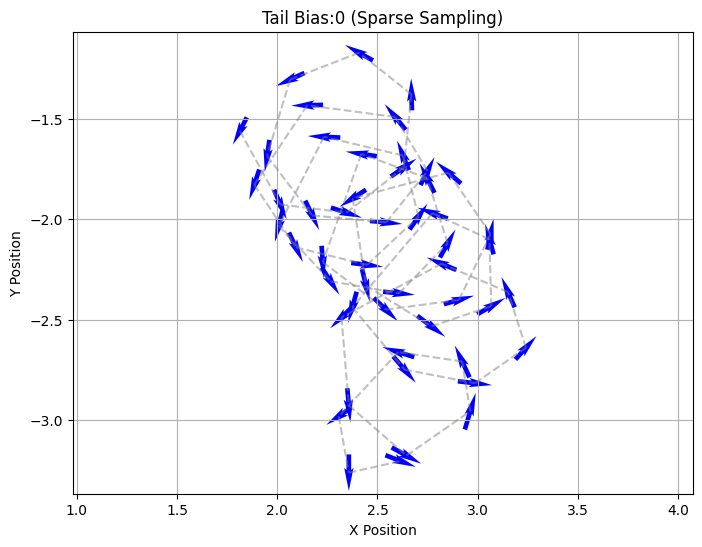

Average Curvature: 0.3985182222734501
Average omegas: 0.2574655040011161
Average Angles: 0.6779144107024598
Curvature Variance: 0.005778371108238654
omegas Variance: 0.025032009425167968
Angle Variance: 0.006293845743207318


In [436]:
# 设置文件夹路径
folder_path = "D:\work\科研项目\snippet\BacksteppingMethod\dynamic_fitting\data"#"./data"

# 使用glob获取所有csv文件路径
tail_biases = [0]
controll_params = [] #[mu_l, mu_r, tail_angle, tail_vel, tail_acc, u, v, omega, u_dot, v_dot]
avg_controll_params = []
for tail_bias in tail_biases:
	csv_file = glob.glob(folder_path + "/Fpec_12-Bias_" + str(tail_bias) + ".csv")
	df = pd.read_csv(csv_file[0], header=None, names=['timestamp', 'state0','state1','state2', 'head_x', 'head_y', 'tail_x', 'tail_y'])
	df = df[((df['head_x'].diff().abs()>=1) |
					(df['head_y'].diff().abs()>=1)) & 
					((df['tail_x'].diff().abs()>=1) |
					(df['tail_y'].diff().abs()>=1))
					]
	df['head_x'] = df['head_x'] / 515 * 2
	df['head_y'] = -df['head_y'] / 515 * 2
	df['tail_x'] = df['tail_x'] / 515 * 2
	df['tail_y'] = -df['tail_y'] / 515 * 2
	df = df.reset_index(drop=True)

	# 示例路径点数据（二维点集，包含噪点）
	path_points_x = np.array(df['tail_x'])
	path_points_y = np.array(df['tail_y'])
	tail_points = np.column_stack((path_points_x, path_points_y))
	path_points_x = np.array(df['head_x'])
	path_points_y = np.array(df['head_y'])
	head_points = np.column_stack((path_points_x, path_points_y))
	timestamps = np.array(df['timestamp'])
	robot_points = (head_points + tail_points)/2
	# 绘制机器人的路径和方向（稀疏采样）
	fig, ax = plt.subplots(figsize=(8, 6))

	# 设置稀疏采样间隔
	sample_interval = int(len(timestamps)/50)  # 每隔50个点画一个箭头

	# 遍历采样后的点
	for i in range(0, len(head_points), sample_interval):
		head = head_points[i]
		tail = tail_points[i]
		
		# 计算机器人的朝向向量
		direction = head - tail
		pos = (head + tail)/2	
		# 画出机器人的位置（箭头的起点）
		ax.quiver(tail[0], tail[1], direction[0], direction[1], angles='xy', scale_units='xy', scale=1, color='blue', headwidth=2)
		
		# 画出路径
		if i > 0:
			prev_pos = robot_points[i - sample_interval]
			ax.plot([prev_pos[0], pos[0]], [prev_pos[1], pos[1]], color='gray', linestyle='--', alpha=0.5)

	# 设置图形参数
	ax.set_aspect('equal', 'box')
	ax.set_xlabel('X Position')
	ax.set_ylabel('Y Position')
	plt.axis('equal')
	plt.grid(True)
	plt.title("Tail Bias:"+ str(tail_bias)+" (Sparse Sampling)")
	plt.show()

	# 调用函数并打印结果
	avg_curvatures, avg_omegas, avg_angles, var_curvatures, var_omegas, var_angles, curvatures, omegas, angles = calculate_curvature_and_angles(head_points, tail_points, timestamps)
	# 输出结果
	print("Average Curvature:", avg_curvatures)
	print("Average omegas:", avg_omegas)
	print("Average Angles:", avg_angles)
	print("Curvature Variance:", var_curvatures)
	print("omegas Variance:", var_omegas)
	print("Angle Variance:", var_angles)

	#储存运动参数
	for i in range(len(curvatures)):
		u = omegas[i] * curvatures[i] * np.cos(angles[i])
		v = omegas[i] * curvatures[i] * np.sin(angles[i])
		controll_params.append((0, 1, [tail_bias, 2*tail_bias], [[u,v], [u,v]], [[0,0],[0,0]], u, v, omegas[i], 0, 0)) #[mu_l, mu_r, tail_angle, tail_vel, tail_acc, u, v, omega, u_dot, v_dot]

	#储存运动参数
	u = avg_omegas * avg_curvatures * np.cos(avg_angles)
	v = avg_omegas * avg_curvatures * np.sin(avg_angles)
	avg_controll_params.append((0, 1, [tail_bias, 2*tail_bias], [[u,v], [u,v]], [[0,0],[0,0]], u, v, avg_omegas, 0, 0)) #[mu_l, mu_r, tail_angle, tail_vel, tail_acc, u, v, omega, u_dot, v_dot]


In [238]:
0.2574655040011161 * np.sin(0.6779144107024598)

0.16147462993052977

In [246]:
0.2974655040011161 * np.sin(0.579144107024598)

0.16280519462960383

In [406]:
0.22603332218018649 * np.sin(0.61)

0.12948713517543722